# Importing the Libraries necessary to create the chart

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch


### Reading the data for the visualisation. Taken from Understat

In [6]:
df =pd.read_csv("/Users/viz/Documents/Projects/Erling Haaland 2022 Understat.csv")

In [7]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [150]:
df['a_team'].nunique()

19

### Scale the pitch to 1 and 100. From the dataset we learn that it is from 0 to 1 which doesn't sit well with our analysis

In [8]:
df['X'] = df['X']*100
df['Y'] = df['Y']*100

### Getting the statistics for the chart

In [9]:
total_shots = df.shape[0]
total_goals = df[df["result"] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X']*1.2).mean()

### Creating the plot using MatplotLib.pyplot

In [31]:
background_colour = '#0C0D0E'


In [ ]:
EAF2E3

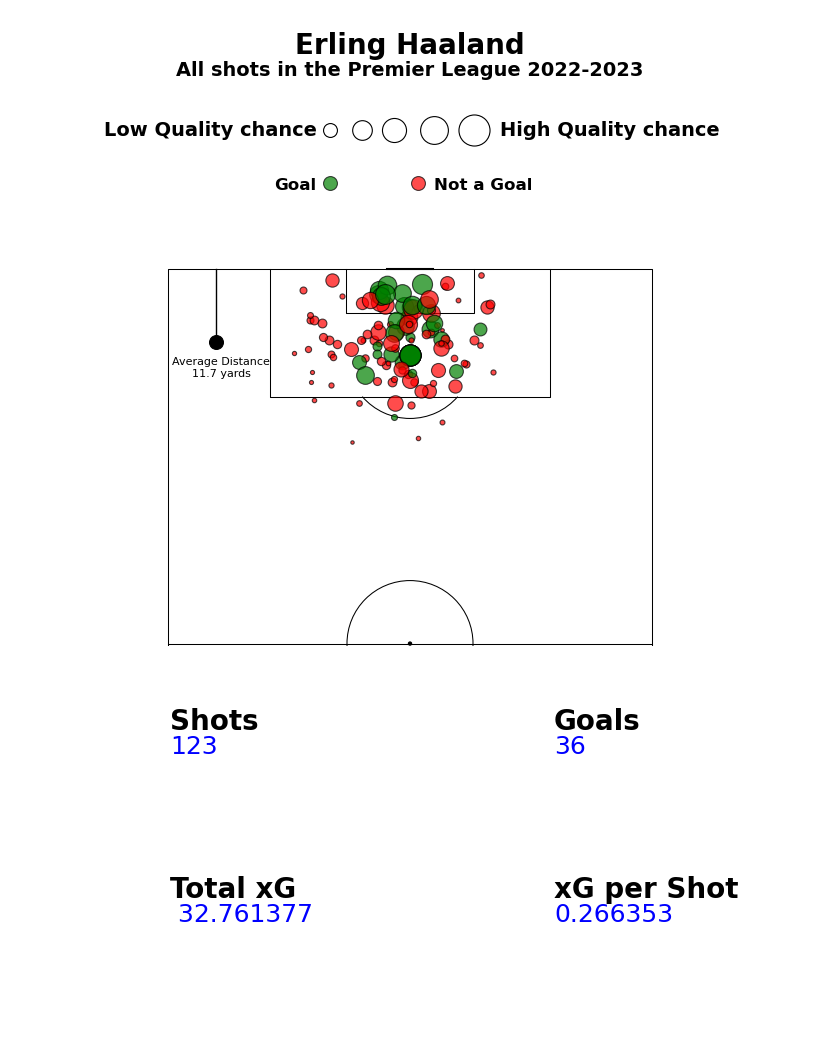

In [144]:
import matplotlib.pyplot as plt

# Set up the figure with a specific background color
fig = plt.figure(figsize=(8, 12))
background_colour = 'white'
fig.patch.set_facecolor(background_colour)

# Equal distribution of axes
# First section for text
ax1 = fig.add_axes([0, 0.66, 1, 0.2])  # 1st section (top third)
ax1.set_facecolor(background_colour)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.text(
    x=0.5,
    y=0.85,
    s='Erling Haaland',
    fontsize=20,
    fontweight='bold',
    color='black',
    ha='center',
    va='center'
)

ax1.text(
    x=0.5,
    y=0.75,
    s='All shots in the Premier League 2022-2023',
    fontsize=14,
    fontweight='bold',
    color='black',
    ha='center',
    va='center'
)

ax1.text(
    x=0.25,
    y=0.5,
    s='Low Quality chance',
    fontsize=14,
    fontweight='bold',
    color='black',
    ha='center',
    va='center'
)

ax1.scatter(
    x = .40,
    y = .50,
    s=100,
    color = background_colour,
    edgecolor = 'black',
    linewidth = 0.8
)
ax1.scatter(
    x = .44,
    y = .50,
    s=200,
    color = background_colour,
    edgecolor = 'black',
    linewidth = 0.8
)
ax1.scatter(
    x = .48,
    y = .50,
    s=300,
    color = background_colour,
    edgecolor = 'black',
    linewidth = 0.8
)
ax1.scatter(
    x = .53,
    y = .50,
    s=400,
    color = background_colour,
    edgecolor = 'black',
    linewidth = 0.8
)
ax1.scatter(
    x = .58,
    y = .50,
    s=500,
    color = background_colour,
    edgecolor = 'black',
    linewidth = 0.8
)


ax1.text(
    x=0.75,
    y=0.5,
    s='High Quality chance',
    fontsize=14,
    fontweight='bold',
    color='black',
    ha='center',
    va='center'
)

ax1.text(
    x = 0.33,
    y = 0.25,
    s = 'Goal',
    fontsize = '12',
    fontweight = 'bold',
    color = 'black',
    ha = 'left'
)

ax1.scatter(
    x = 0.40,
    y = 0.28,
    s = 100,
    color = 'green',
    edgecolor = 'black',
    linewidth = 0.8,
    alpha = 0.7
)

ax1.scatter(
    x = 0.51,
    y = 0.28,
    s = 100,
    color = 'red',
    edgecolor = 'black',
    linewidth = 0.8,
    alpha = 0.7
)

ax1.text(
    x = 0.53,
    y = 0.25,
    s = 'Not a Goal',
    fontsize = '12',
    fontweight = 'bold',
    color = 'black',
    ha = 'left'
)

ax1.axis('off')  # Hide axes



# Middle section for the chart
ax2 = fig.add_axes([0, 0.33, 1, 0.33])  # 2nd section (middle third)
ax2.set_facecolor(background_colour)
# Example of plotting something in the main chart area
pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_colour,
    pad_bottom=.5,
    line_color='black',
    linewidth= 0.75,
    axis=False,
    label=False
)
pitch.draw(ax=ax2)

ax2.scatter(x=90, y = points_average_distance,
            s=100, color = 'black', linewidths=0.8)

ax2.plot([90,90],[100, points_average_distance], color = 'black', linewidth = 1)
text_y_position = points_average_distance - 2 # Increased the offset

ax2.text(
    x=89, y=text_y_position,
    s=f'Average Distance\n{actual_average_distance:.1f} yards',
    fontsize='8', color='black', ha='center', va='top'
)

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color = 'green' if x['result'] == 'Goal' else 'red',
        ax=ax2,
        alpha = 0.7,
        linewidth = .8,
        edgecolor = 'black'
    )

# Third section for additional text
ax3 = fig.add_axes([0, 0, 1, 0.2])  # 3rd section (bottom third)
ax3.set_facecolor(background_colour)

ax3.text(x = .2, y = 1.3,s = 'Shots', fontsize = 20, fontweight ='bold', color = 'black' , ha = 'left')
ax3.text(x=.2, y = 1.2, s=f'{total_shots}', fontsize = 18 , color = 'blue', ha='left')

ax3.text(x = 0.68, y = 1.3,s = 'Goals', fontsize = 20, fontweight ='bold', color = 'black' , ha = 'left')
ax3.text(x= 0.68, y = 1.2, s=f'{total_goals}', fontsize = 18 , color = 'blue', ha='left')

ax3.text(x = .2, y = .6,s = 'Total xG', fontsize = 20, fontweight ='bold', color = 'black' , ha = 'left')
ax3.text(x= 0.2, y = 0.5, s=f'{total_xG: 2f}', fontsize = 18 , color = 'blue', ha='left')

ax3.text(x = 0.68, y = .6,s = 'xG per Shot', fontsize = 20, fontweight ='bold', color = 'black' , ha = 'left')
ax3.text(x= 0.68, y = 0.5, s=f'{xG_per_shot:2f}', fontsize = 18 , color = 'blue', ha='left')




ax3.axis('off')  # Hide axes
plt.show()

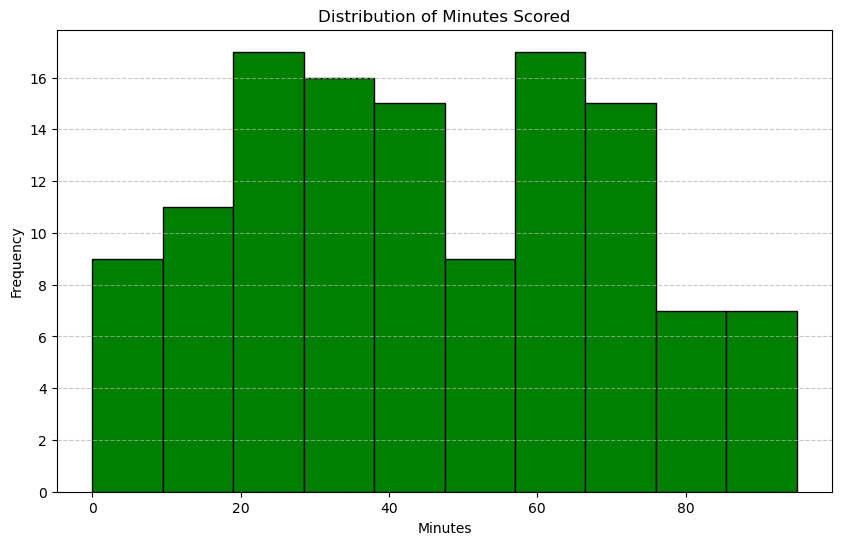

In [152]:
minutes_scored = df['minute']

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(minutes_scored, bins=10, edgecolor='black', color = 'green')

# Customize the plot
plt.title('Distribution of Minutes Scored')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

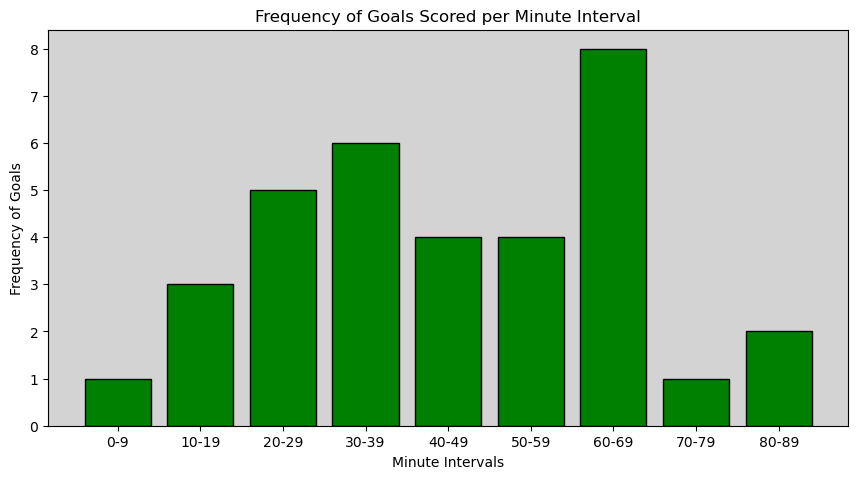

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt

# Set up the figure with a specific background color
fig = plt.figure(figsize=(8, 12))
background_colour = 'white'
fig.patch.set_facecolor(background_colour)

# Equal distribution of axes
# First section for text
# ax1 = fig.add_axes([0, 0.66, 1, 0.2])  # 1st section (top third)
# ax1.set_facecolor(background_colour)
# ax1.set_xlim(0, 1)
# ax1.set_ylim(0, 1)
# ax1.text(
#     x=0.5,
#     y=0.85,
#     s='Erling Haaland',
#     fontsize=20,
#     fontweight='bold',
#     color='black',
#     ha='center',
#     va='center'
# )

# ax1.text(
#     x=0.5,
#     y=0.75,
#     s='All goals across the distribution of minutes in a match day',
#     fontsize=14,
#     fontweight='bold',
#     color='black',
#     ha='center',
#     va='center', 
# )
# ax1.axis('off')





minutes_scored = df.loc[df['result'] == 'Goal', 'minute']
# Middle section for the chart
ax2 = fig.add_axes([0, 0.33, 1, 0.33])  # 2nd section (middle third)
ax2.set_facecolor(background_colour)
# Example of plotting something in the main chart area

# ax2.hist(minutes_scored, bins=10, edgecolor='black', color = 'green')

# Create bins for 10-minute intervals
bins = np.arange(0, 100, 10)
labels = [f'{i}-{i+9}' for i in range(0, 90, 10)]

# Categorize the minutes when goals were scored
categorized_minutes = pd.cut(minutes_scored, bins=bins, labels=labels, right=False)

# Calculate frequency counts
frequency_counts = categorized_minutes.value_counts().sort_index()

# Create a new figure

# Set background color
ax2.set_facecolor('lightgray')

# Create the bar plot
ax2.bar(labels, frequency_counts, color='green', edgecolor='black')

# Labeling the axes
ax2.set_xlabel('Minute Intervals')
ax2.set_ylabel('Frequency of Goals')
ax2.set_title('Frequency of Goals Scored per Minute Interval')

# Display the plot
plt.show()



# ax2.axis('off')

# Third section for additional text
# ax3 = fig.add_axes([0, 0, 1, 0.2])  # 3rd section (bottom third)
# ax3.set_facecolor(background_colour)

# ax3.text(x = .2, y = 1.3,s = 'Shots', fontsize = 20, fontweight ='bold', color = 'black' , ha = 'left')
# ax3.text(x=.2, y = 1.2, s=f'{total_shots}', fontsize = 18 , color = 'blue', ha='left')





# ax3.axis('off')  # Hide axes
# plt.show()

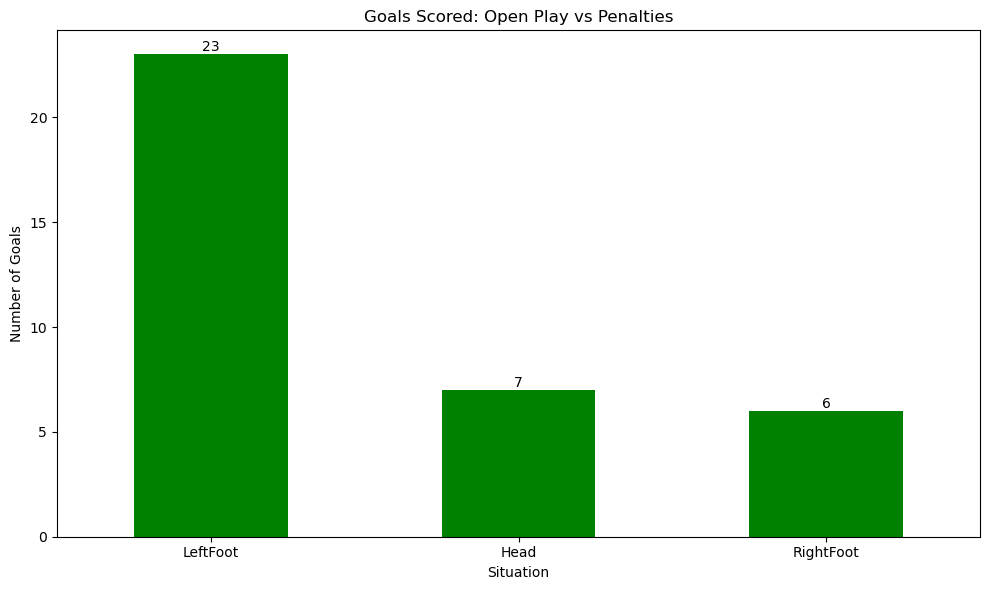

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame called 'df'

# Filter the DataFrame to include only goals
goals_df = df[df['result'] == 'Goal']

# Count the goals for each situation
goal_counts = goals_df['shotType'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
goal_counts.plot(kind='bar', color = 'green')

# Customize the plot
plt.title('Goals Scored: Open Play vs Penalties')
plt.xlabel('Situation')
plt.ylabel('Number of Goals')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(goal_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


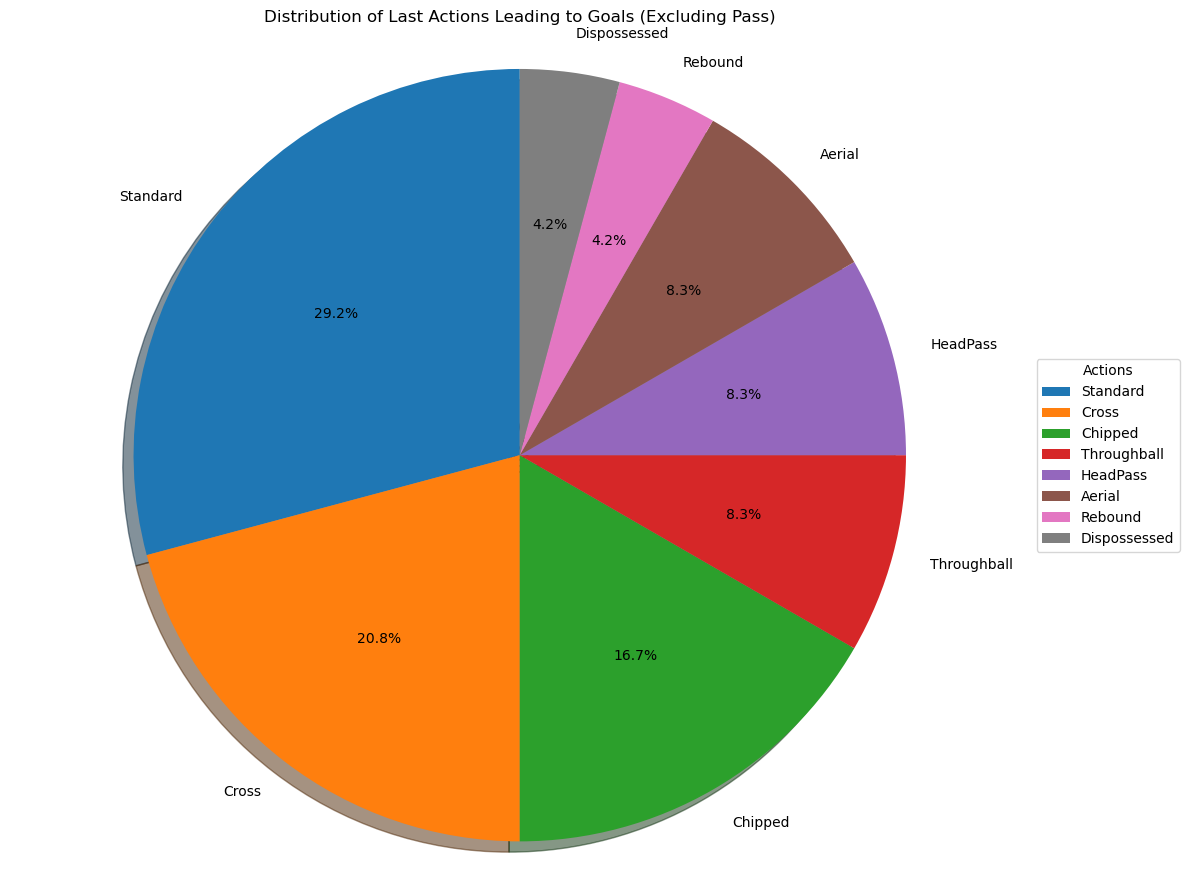

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame for goals
goals_df = df[df['result'] == 'Goal']

# Count the occurrences of each lastAction for goals, excluding 'Pass'
action_counts = goals_df[goals_df['lastAction'] != 'Pass']['lastAction'].value_counts()

plt.figure(figsize=(12, 9))
plt.pie(action_counts.values, labels=action_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Last Actions Leading to Goals (Excluding Pass)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Actions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.tight_layout()
plt.show()


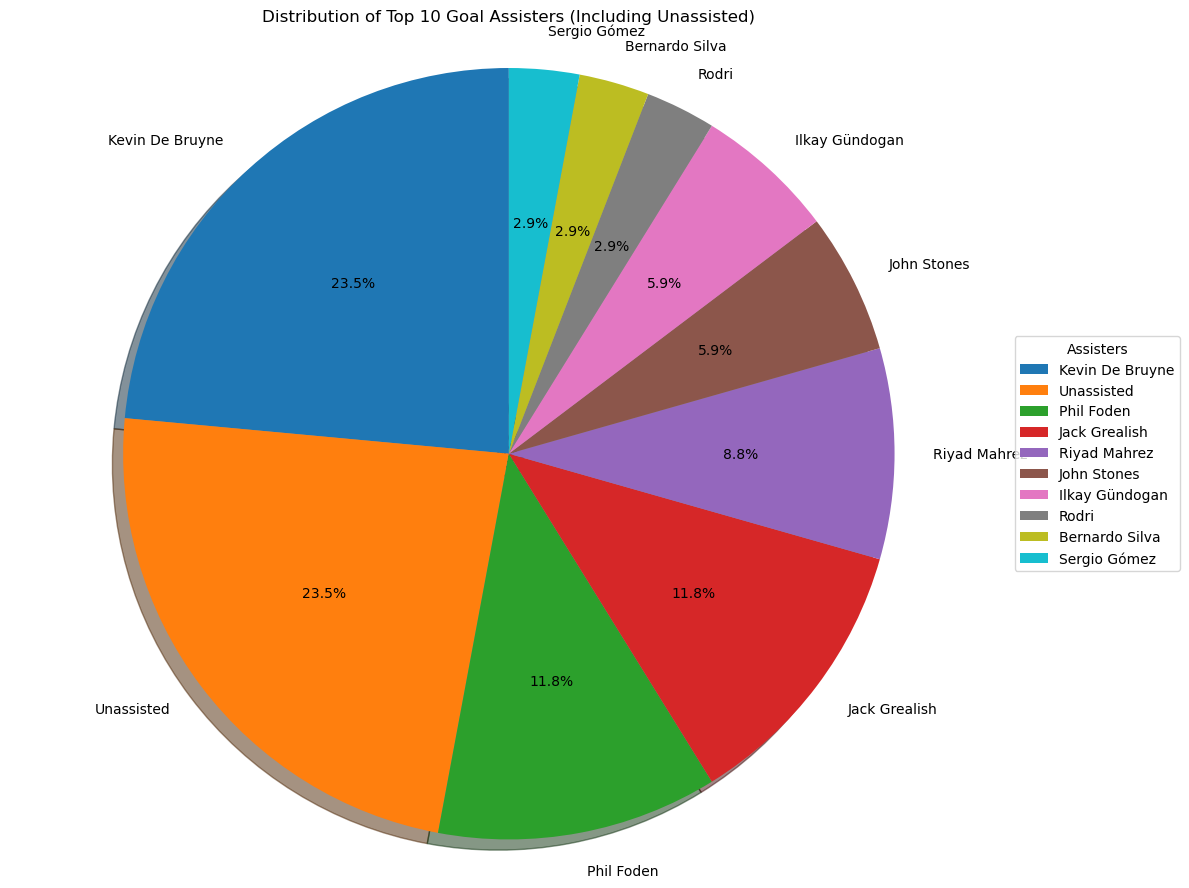

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame for goals
goals_df = df[df['result'] == 'Goal']

# Count the occurrences of each player_assisted for goals
assist_counts = goals_df['player_assisted'].value_counts()

# Calculate the percentage of unassisted goals
unassisted_goals = goals_df['player_assisted'].isna().sum()
total_goals = len(goals_df)
unassisted_percentage = (unassisted_goals / total_goals) * 100

# Add 'Unassisted' to the assist_counts
assist_counts['Unassisted'] = unassisted_goals

# Sort the assist_counts in descending order and take the top 10
top_10_assists = assist_counts.nlargest(10)

plt.figure(figsize=(12, 9))
plt.pie(top_10_assists.values, labels=top_10_assists.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Top 10 Goal Assisters (Including Unassisted)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Assisters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.tight_layout()
plt.show()


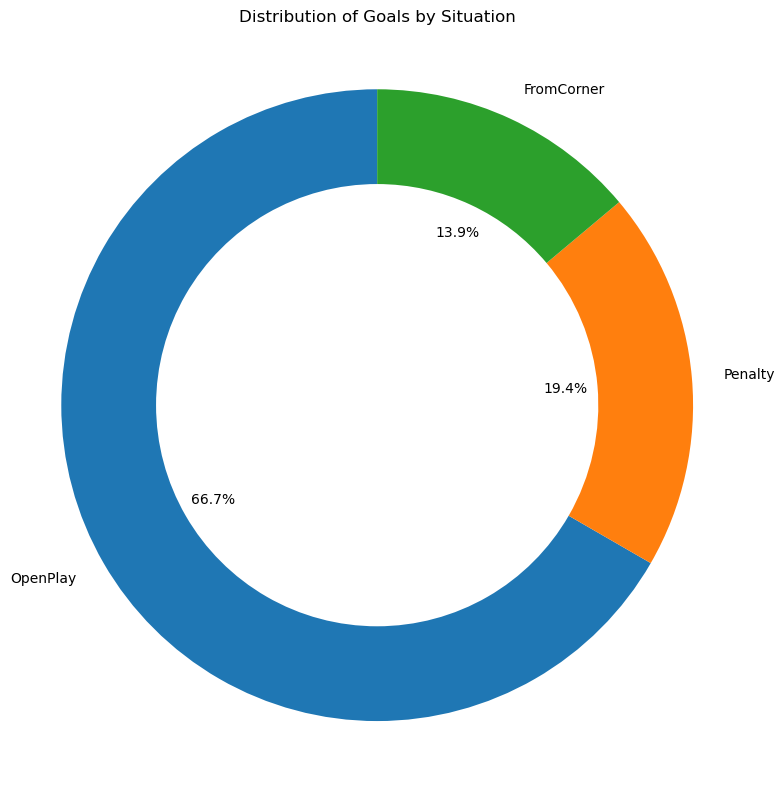

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame for goals
goals_df = df[df['result'] == 'Goal']

# Count the occurrences of each situation
situation_counts = goals_df['situation'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(situation_counts, labels=situation_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Goals by Situation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.tight_layout()
plt.show()
